In [83]:
import os, shutil
from keras import optimizers
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

In [84]:
original_datasets_dir_normal = r'F:/Kaggle/Pneumonia-chest-xray/data/NORMAL/'
original_datasets_dir_pneumonia = r'F:/Kaggle/Pneumonia-chest-xray/data/PNEUMONIA/'

base_dir = r'F:/Kaggle/Pneumonia-chest-xray/data/'
if not os.path.isdir(base_dir): os.mkdir(base_dir)

In [85]:
train_dir = os.path.join(base_dir,'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)
val_dir = os.path.join(base_dir,'val')
if not os.path.isdir(val_dir): os.mkdir(val_dir)
test_dir = os.path.join(base_dir,'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)

In [86]:
train_normal_dir = os.path.join(train_dir,'NORMAL')
if not os.path.isdir(train_normal_dir):
    os.mkdir(train_normal_dir)
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
if not os.path.isdir(train_pneumonia_dir):
    os.mkdir(train_pneumonia_dir)
test_normal_dir = os.path.join(test_dir,'NORMAL')
if not os.path.isdir(test_normal_dir):
    os.mkdir(test_normal_dir)
test_pneumonia_dir = os.path.join(test_dir,'PNEUMONIA')
if not os.path.isdir(test_pneumonia_dir):
    os.mkdir(test_pneumonia_dir)
val_normal_dir = os.path.join(val_dir,'NORMAL')
if not os.path.isdir(val_normal_dir):
    os.mkdir(val_normal_dir)
val_pneumonia_dir = os.path.join(val_dir,'PNEUMONIA')
if not os.path.isdir(val_pneumonia_dir):
    os.mkdir(val_pneumonia_dir)

In [87]:
fnames = ['1 ({}).jpeg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_normal, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['1 ({}).jpeg'.format(i) for i in range(1001,1301)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_normal, fname)
    dst = os.path.join(val_normal_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['1 ({}).jpeg'.format(i) for i in range(1301,1501)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_normal, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['2 ({}).jpeg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_pneumonia, fname)
    dst = os.path.join(train_pneumonia_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['2 ({}).jpeg'.format(i) for i in range(1001,1301)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_pneumonia, fname)
    dst = os.path.join(val_pneumonia_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['2 ({}).jpeg'.format(i) for i in range(1301,1501)]
for fname in fnames:
    src = os.path.join(original_datasets_dir_pneumonia, fname)
    dst = os.path.join(test_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

In [88]:
train_datasets_normal = r'F:/F:/Kaggle/Pneumonia-chest-xray/data/train/NORMAL/'
train_datasets_pneumonia = r'/F:/Kaggle/Pneumonia-chest-xray/data/train/PNEUMONIA/'
val_datasets_normal = r'F:/F:/Kaggle/Pneumonia-chest-xray/data/val/NORMAL/'
val_datasets_pneumonia = r'/F:/Kaggle/Pneumonia-chest-xray/data/val/PNEUMONIA/'
test_datasets_normal = r'F:/F:/Kaggle/Pneumonia-chest-xray/data/test/NORMAL/'
test_datasets_pneumonia = r'/F:/Kaggle/Pneumonia-chest-xray/data/test/PNEUMONIA/'

train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
all_train_contents = train_normal + train_pneumonia
print("all_train_contents: ", all_train_contents)

val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
all_val_contents = val_normal + val_pneumonia
print("all_val_contents: ", all_val_contents)

test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
all_test_contents = test_normal + test_pneumonia
print("all_test_contents: ", all_test_contents)

all_normal = train_normal + val_normal + test_normal
print("all_normal: ", all_normal)
all_pneumonia = train_pneumonia + val_pneumonia + test_pneumonia
print("all_pneumonia: ", all_pneumonia)

all_train_contents:  2000
all_val_contents:  600
all_test_contents:  400
all_normal:  1500
all_pneumonia:  1500


In [89]:
print('Train Normal images: ', len(os.listdir(train_normal_dir)))
print('Train Pneumonia images: ', len(os.listdir(train_pneumonia_dir)))

print('Val Normal images: ', len(os.listdir(val_pneumonia_dir)))
print('Val Pneumonia images: ', len(os.listdir(val_pneumonia_dir)))

print('Test Normal images: ', len(os.listdir(test_normal_dir)))
print('Test Pneumonia images: ', len(os.listdir(test_pneumonia_dir)))

Train Normal images:  1000
Train Pneumonia images:  1000
Val Normal images:  300
Val Pneumonia images:  300
Test Normal images:  200
Test Pneumonia images:  200


In [101]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)      

In [102]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])

In [103]:
train_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_generator.flow_from_directory(train_dir, 
                                                      target_size=(150,150), 
                                                      batch_size=20, 
                                                      class_mode='categorical')
val_generator = val_generator.flow_from_directory(val_dir, 
                                                   target_size=(150,150), 
                                                   batch_size=6, 
                                                   class_mode='categorical')
test_generator = test_generator.flow_from_directory(test_dir, 
                                                   target_size=(150,150), 
                                                   batch_size=4, 
                                                   class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [104]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ',data_batch.shape)
    print('labels batch shape: ',labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20, 2)


In [105]:
history = model.fit(train_generator, 
                    steps_per_epoch=100, 
                    epochs=100, 
                    validation_data=val_generator, 
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 220ms/step - loss: 0.7174 - accuracy: 0.5505 - precision: 0.5505 - recall: 0.5505 - val_loss: 0.6787 - val_accuracy: 0.7900 - val_precision: 0.7900 - val_recall: 0.7900
Epoch 2/100
100/100 [==============================] - 16s 165ms/step - loss: 0.5297 - accuracy: 0.7435 - precision: 0.7435 - recall: 0.7435 - val_loss: 0.5035 - val_accuracy: 0.8800 - val_precision: 0.8800 - val_recall: 0.8800
Epoch 3/100
100/100 [==============================] - 16s 163ms/step - loss: 0.3651 - accuracy: 0.8630 - precision: 0.8630 - recall: 0.8630 - val_loss: 0.7853 - val_accuracy: 0.5233 - val_precision: 0.5233 - val_recall: 0.5233
Epoch 4/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3056 - accuracy: 0.8715 - precision: 0.8715 - recall: 0.8715 - val_loss: 0.9843 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 5/100
100/100 [==============================] - 16s 162ms/step - loss: 0.3266 - a

Epoch 72/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0544 - accuracy: 0.9780 - precision: 0.9780 - recall: 0.9780 - val_loss: 0.1896 - val_accuracy: 0.9567 - val_precision: 0.9567 - val_recall: 0.9567
Epoch 73/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0561 - accuracy: 0.9770 - precision: 0.9770 - recall: 0.9770 - val_loss: 0.3815 - val_accuracy: 0.9333 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 74/100
100/100 [==============================] - 16s 161ms/step - loss: 0.0707 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9750 - val_loss: 0.4880 - val_accuracy: 0.9300 - val_precision: 0.9300 - val_recall: 0.9300
Epoch 75/100
100/100 [==============================] - 16s 162ms/step - loss: 0.0805 - accuracy: 0.9735 - precision: 0.9735 - recall: 0.9735 - val_loss: 0.2884 - val_accuracy: 0.9500 - val_precision: 0.9500 - val_recall: 0.9500
Epoch 76/100
100/100 [==============================] - 16s 161ms/step - loss: 0.069

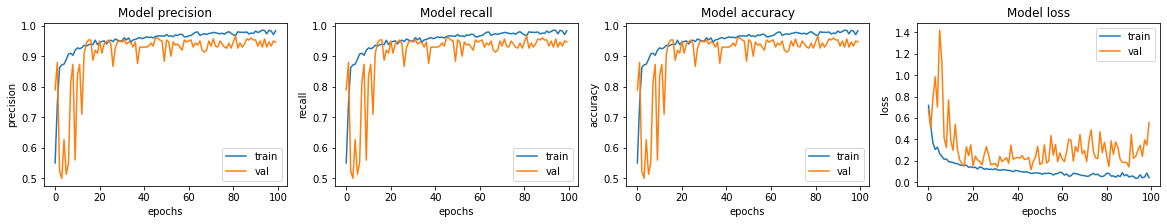

In [106]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [107]:
loss, acc, prec, rec = model.evaluate(test_generator)

100/100 [==============================] - 4s 43ms/step - loss: 0.4376 - accuracy: 0.9300 - precision: 0.9300 - recall: 0.9300


In [110]:
model.save('Pneumonia-chest-xray.h5')